In [1]:
print('hi')

hi


/tmp/ipykernel_3885/3608700872.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  numerator_num = np.trapz((2 * k_vals) * A_vals**2, k_vals)
/tmp/ipykernel_3885/3608700872.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  denominator_num = np.trapz(A_vals**2, k_vals)


Integral(Abs(A(k))**2*Derivative(omega(k), k), (k, -oo, oo))/Integral(Abs(A(k))**2, (k, -oo, oo))

np.float64(4.4291490519813586e-17)

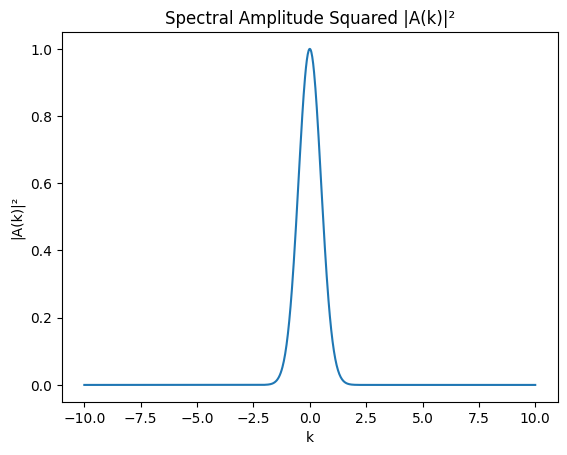

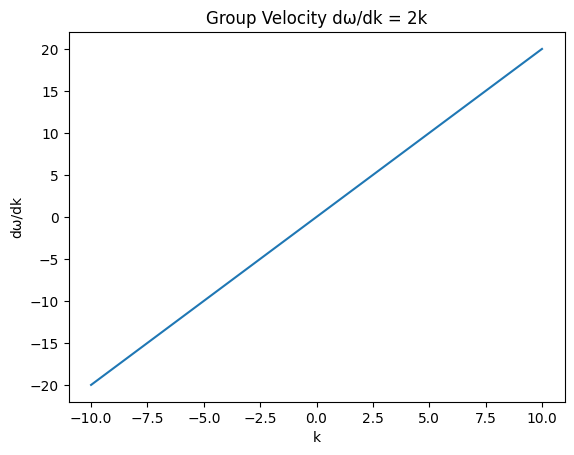

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# symbolic verification
k = sp.Symbol('k', real=True)
omega = sp.Function('omega')(k)
A = sp.Function('A')(k)

# symbolic numerator and denominator
numerator = sp.integrate(sp.diff(omega, k) * sp.Abs(A)**2, (k, -sp.oo, sp.oo))
denominator = sp.integrate(sp.Abs(A)**2, (k, -sp.oo, sp.oo))
dr_dt = numerator / denominator
dr_dt_simplified = sp.simplify(dr_dt)

# numeric check: define specific A(k) and omega(k)
k_vals = np.linspace(-10, 10, 1000)
A_vals = np.exp(-k_vals**2)
omega_vals = k_vals**2  # quadratic dispersion

numerator_num = np.trapz((2 * k_vals) * A_vals**2, k_vals)
denominator_num = np.trapz(A_vals**2, k_vals)
dr_dt_numeric = numerator_num / denominator_num

# plotting
fig1, ax1 = plt.subplots()
ax1.plot(k_vals, A_vals**2)
ax1.set_title('Spectral Amplitude Squared |A(k)|²')
ax1.set_xlabel('k')
ax1.set_ylabel('|A(k)|²')

fig2, ax2 = plt.subplots()
ax2.plot(k_vals, 2 * k_vals)
ax2.set_title('Group Velocity dω/dk = 2k')
ax2.set_xlabel('k')
ax2.set_ylabel('dω/dk')

display(dr_dt_simplified,dr_dt_numeric)
